In [1]:
import init_notebook
from torchvision.datasets import MNIST
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from vae import VAETrainer, VAEConfig

In [2]:
mnist =  MNIST(root = './', download = True)
X = mnist.data
y = mnist.targets

print(f"input shape:",list(X.shape))
print(f"targets/y shape:",list(y.shape))
print("pixel [min, max]:",f"[{X.min().item()}, {X.max().item()}]")

input shape: [60000, 28, 28]
targets/y shape: [60000]
pixel [min, max]: [0, 255]


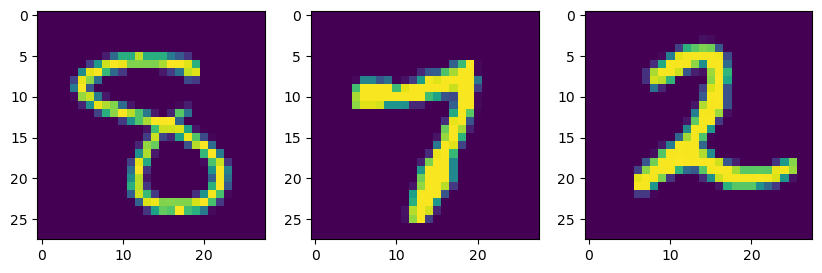

In [3]:
three_random_indices = np.random.randint(low=0, high=X.shape[0] - 1, size=3)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

for i, axis in zip(three_random_indices, axes):
    image = X[i]
    axis.imshow(image)

In [4]:
X = X / 255
print(X.min().item(), X.max().item())

0.0 1.0


In [5]:
X = X.view(X.shape[0], -1)
X.shape

torch.Size([60000, 784])

In [6]:
n = len(X)

randomindices = torch.randperm(n)
train_size = int(0.8 * n)

X_train = X[:train_size]
y_train = y[:train_size]
train_dataset = TensorDataset(X_train, y_train)


X_test = X[train_size:]
y_test = y[train_size:]
test_dataset = TensorDataset(X_test, y_test)

print("Train-Test Split:", train_size, n - train_size)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Train-Test Split: 48000 12000
Shape of X_train: torch.Size([48000, 784])
Shape of y_train: torch.Size([48000])
Shape of X_test: torch.Size([12000, 784])
Shape of y_test: torch.Size([12000])


Train: 100%|██████████| 375/375 [00:01<00:00, 325.50it/s, epoch=50, kl_loss=1397.4707, loss=5281.1430, lr=0.0010, mse_loss=3920.0386]


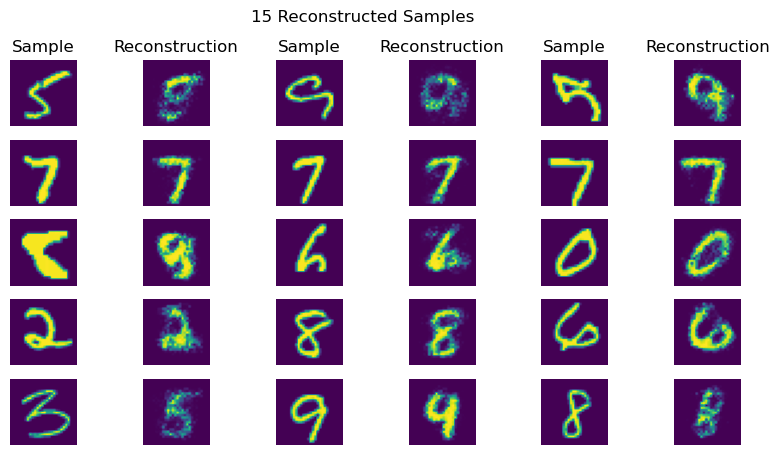

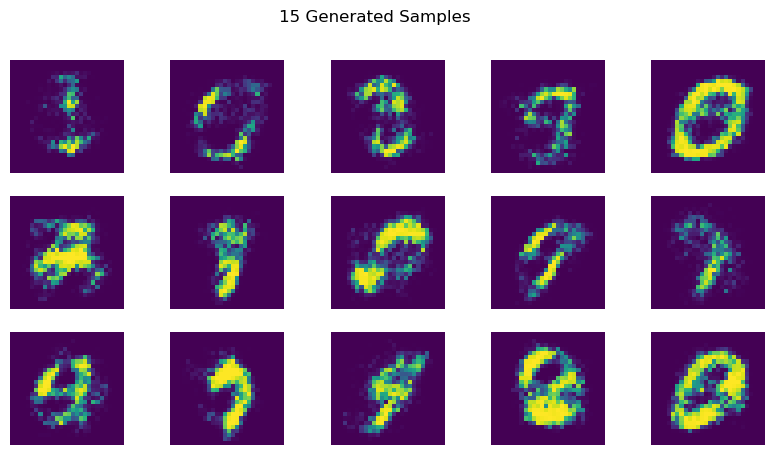

Train: 100%|██████████| 375/375 [00:01<00:00, 362.59it/s, epoch=100, kl_loss=1384.9493, loss=5189.3828, lr=0.0010, mse_loss=3574.3154]


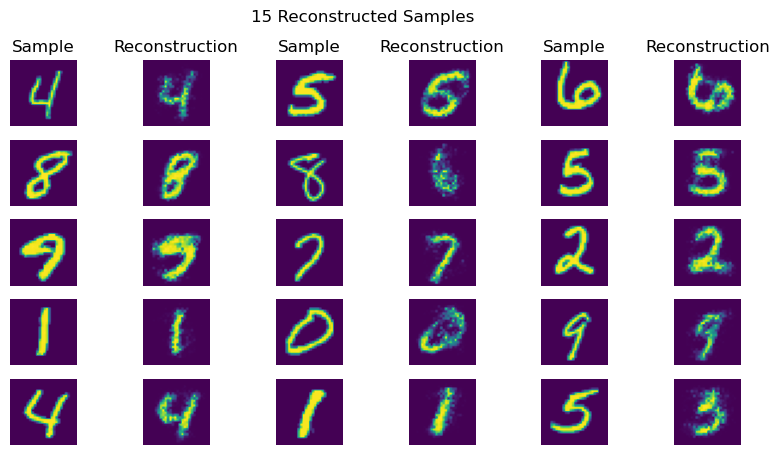

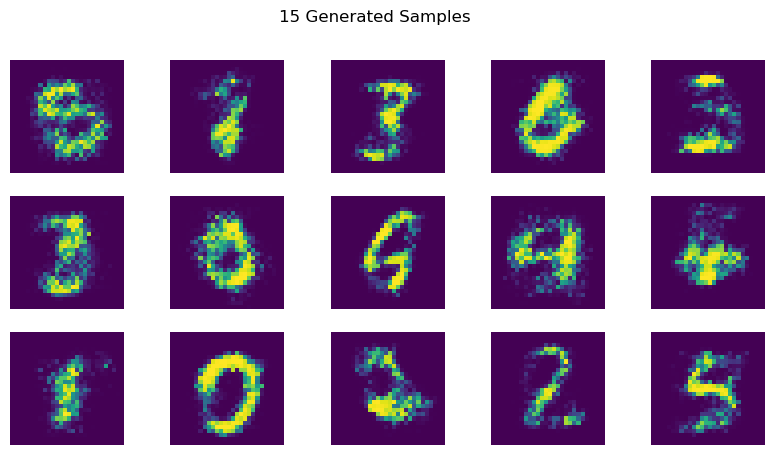

Train: 100%|██████████| 375/375 [00:01<00:00, 361.52it/s, epoch=150, kl_loss=1422.9357, loss=5155.2150, lr=0.0010, mse_loss=3630.7354]


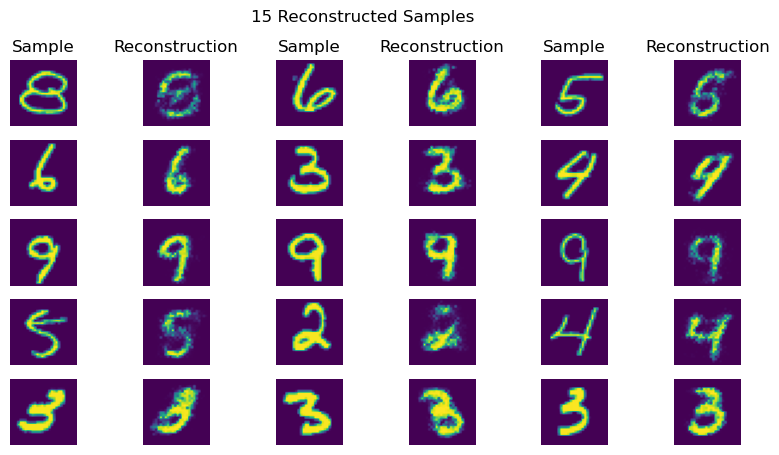

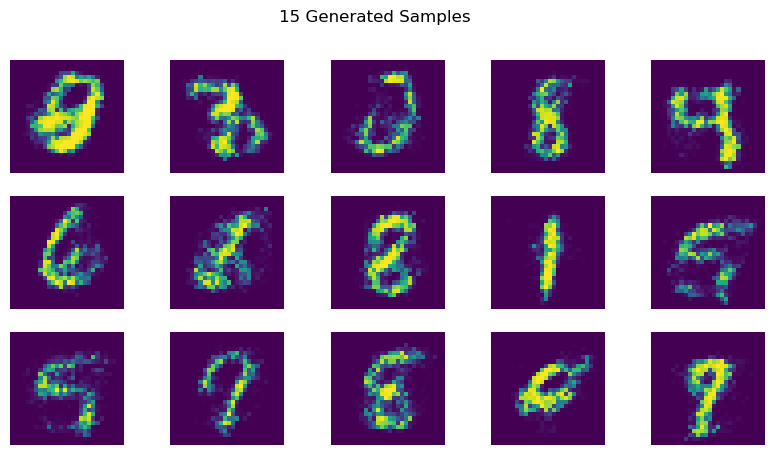

Train: 100%|██████████| 375/375 [00:01<00:00, 339.52it/s, epoch=200, kl_loss=1441.4955, loss=5144.4045, lr=0.0010, mse_loss=3493.2952]


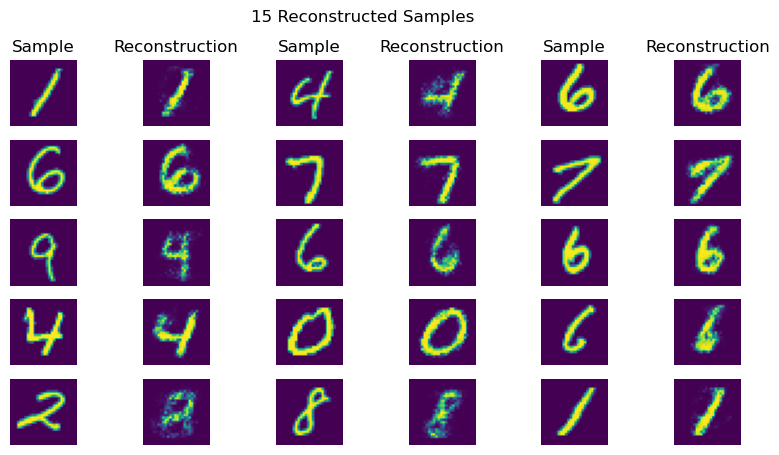

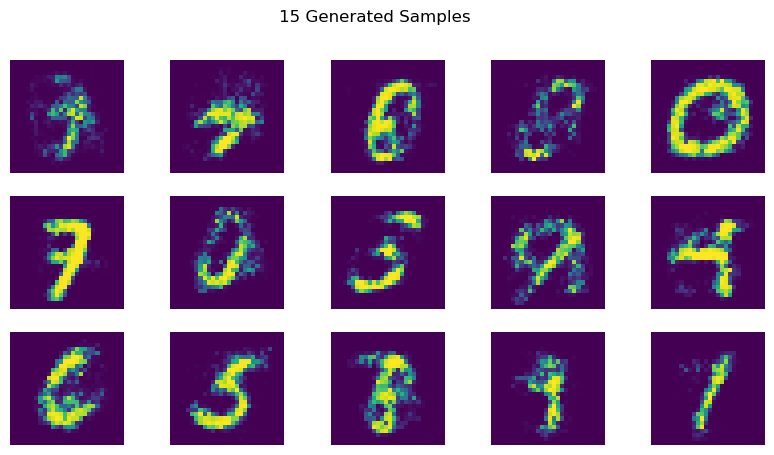

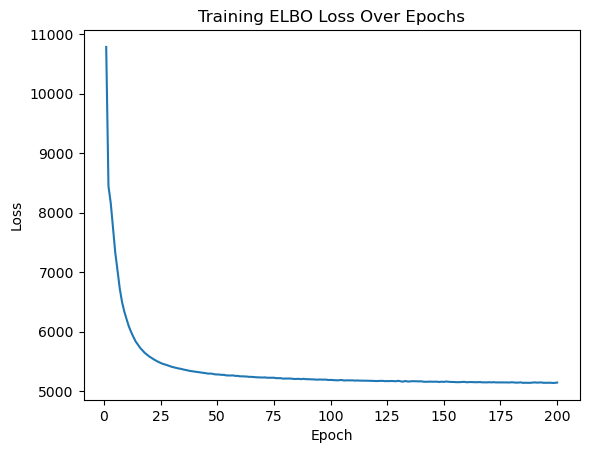

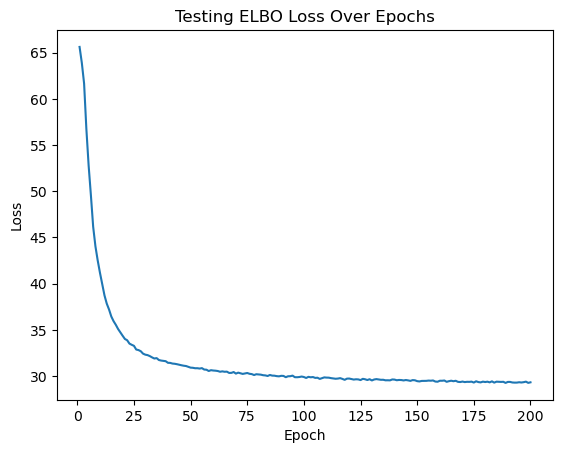

In [8]:
config = VAEConfig(input_dim=28 * 28, latent_dim=12, encoder_layers=[256,256], decoder_layers=[256,256], learning_rate=0.001, batch_size=128, epochs=200, visualization_interval=50)
vae_trainer = VAETrainer(config=config, train_set=train_dataset, test_set=test_dataset)

vae_trainer.train()